In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../dataset/')
from dataset import AsbestosDataSet
import os 
from pathlib import Path
import json
from pycocotools.coco import COCO
from PIL import Image


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##Конверт

In [3]:
def create_annotation_mask(coco_set, img_indx, image_root, category_name = 'asbest'):
    cat_ids  = coco_set.getCatIds(catNms=[category_name])
    img_ids  = coco_set.getImgIds(catIds=cat_ids );
    image_dict = coco_set.loadImgs(img_indx)[0]
    ann_ids = coco_set.getAnnIds(imgIds=image_dict['id'], catIds=cat_ids, iscrowd=None)
    anns = coco_set.loadAnns(ann_ids)
    for i in range(len(anns)):
        if i == 0:
            mask = np.array(coco_set.annToMask(anns[0]), dtype = np.int64)
        else:
            mask += coco_set.annToMask(anns[i])
    mask[mask>1] = 1#for stones!
    return mask

In [4]:
#Create asbest segmentation from annotation file
def create_segmentation_from_annotation(coco_dataset, image_root, out_segmentation_root, category_name):
    for idx, image_name in coco_dataset.imgs.items():
        name = image_name['file_name'].split('/')[-1].split('.')[0]
        try:
            mask = create_annotation_mask(coco_dataset, idx, image_root, category_name)
            plt.imsave(os.path.join(out_segmentation_root, name + '.jpeg'), mask, cmap='Greys')
        except Exception as err:
            print(idx, err)       
        if idx%10 == 0:
            print(idx)

In [5]:
coco_set = COCO('/home/kirill/Учеба/asbestos/task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/annotations/instances_default.json')
coco_set.dataset['categories']

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


[{'id': 1, 'name': 'stone', 'supercategory': ''},
 {'id': 2, 'name': 'asbest', 'supercategory': ''}]

In [6]:
segmentation_root = '/home/kirill/Учеба/asbestos/task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/SegmentationAsbest'
segmentation_rock_root = '/home/kirill/Учеба/asbestos/task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/SegmentationRock'
image_path = '/home/kirill/Учеба/asbestos/task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/JPEGImages/'

In [7]:
create_segmentation_from_annotation(coco_set, image_path, segmentation_rock_root, 'asbest')

10
20
30
40
50
56 local variable 'mask' referenced before assignment


In [33]:
mask = create_annotation_mask(coco_set, 18, image_path, category_name='stone')
mask = create_annotation_mask(coco_set, 1, image_path, category_name='asbest')
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

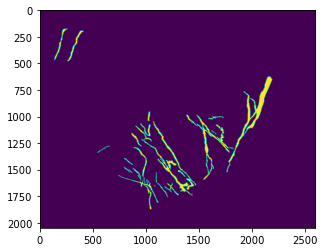

In [34]:
plt.imshow(mask)

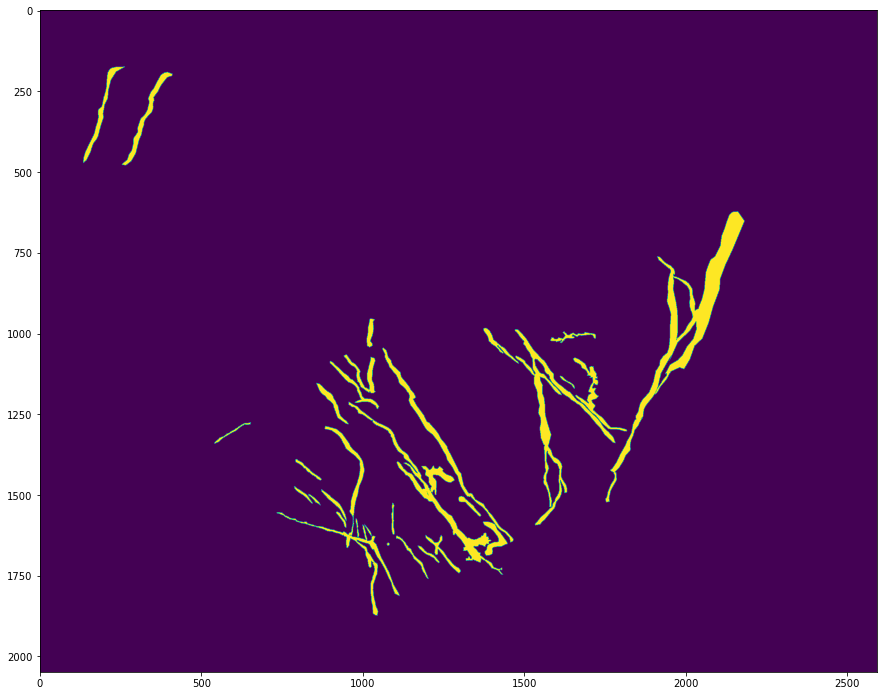

In [35]:
fig = plt.figure(figsize = (15,15))
plt.imshow(mask)